# Exercises 06

## Exercise 06.1
The exercise consist of completing the provided code and performing a Monte Carlo simulation, using both the Metropolis algorithm and the Gibbs sampling of a system of spins in a 1D Ising Model.

Then, one wants to study the internal energy, the heat capacity, and the magnetic susceptibility per unit spin, without any external magnetic field, and study the magnetization of the system with an external field applied, all these four quantities have to be studied in function of a varying temperature, between $0.5$ and $2$ in reduced units.
\
The interaction potential between the spins is given by the following Hamiltonian:

$$ H = -J\sum_{i=1}^{N-1} s_i s_{i+1} - \frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

where $J$ is a coupling constant which can assume the values of 1, in case the system is ferromagnetic, or -1, in case the system is antiferromagnetic; $N$ is the number of the spins and $h$ is the external magnetic field.
\
Note: since the model is 1D, and the spins can only be in two states (up or down), it's possible do calculate the partition function of this system, indeed, it is:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
\
Using the tools of statistical mechanics is possible to estimate the Helmoltz free energy $A$ and, in particular, the internal energy $U$, the heat capacity $C$, the magnetization $M$, and magnetical susceptibility $\chi$.

1. **Internal energy** per spin (with $h = 0$):

The statistical mechanics exact calculus is the following:

$$
\frac{U(N,T)}{N} = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

In the charts below it is shown the difference between the results produced via the Monte Carlo simulation and the statistical mechanics result (Metropolis in blue and Gibbs in orange), as we can see both the simulations provided two results in agreement with the expected value of 0.

Note: both the Metropolis and the Gibbs sampling give, in the worst case, a 2-$\sigma$ agreement with the prediction.

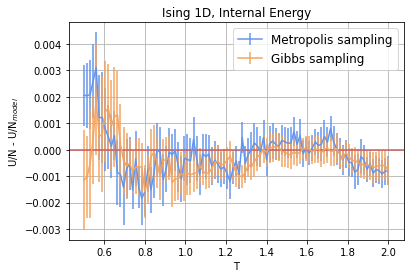

In [1]:
import numpy as np
from matplotlib import pyplot as plt

J = 1.
Ns = 50

temp = np.loadtxt("./data/metropolis/h_0/output_ene.dat", usecols = 0)
ener_metro = np.loadtxt("./data/metropolis/h_0/output_ene.dat", usecols = 3)
err_ener_metro = np.loadtxt("./data/metropolis/h_0/output_ene.dat", usecols = 4)
ener_gibbs = np.loadtxt("./data/gibbs/h_0/output_ene.dat", usecols = 3)
err_ener_gibbs = np.loadtxt("./data/gibbs/h_0/output_ene.dat", usecols = 4)

beta = 1/temp
th = np.tanh(J/temp)
thN= th**Ns
ch = 1./th
ener_mod = -J*( th + ch*thN )/( 1 + thN )

plt.title("Ising 1D, Internal Energy")
plt.xlabel("T")
plt.ylabel("U/N - U/N$_{model}$")
plt.errorbar(temp, ener_metro - ener_mod, yerr = err_ener_metro, color="cornflowerblue")
plt.errorbar(temp, ener_gibbs - ener_mod, yerr = err_ener_gibbs, color="sandybrown")
plt.legend(["Metropolis sampling","Gibbs sampling"], loc=0, fontsize=12)
plt.axhline(y = 0, color = "indianred", linestyle = '-')
plt.grid()
plt.show()

2. **Heat capacity** per spin (with $h = 0$):

The statistical mechanics exact calculus is the following:

$$
\frac{C(N,T)}{N} = k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} - N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

In the charts below it is shown the difference between the results produced via the Monte Carlo simulation and the statistical mechanics result, as one can see both the simulations provided two results in agreement with the expected value.

Note: both the simulations are in 2-$\sigma$ agreement at law temperature, while the result improves at high temperature, in general the agreement between the two simulations stays within 2 $\sigma$.

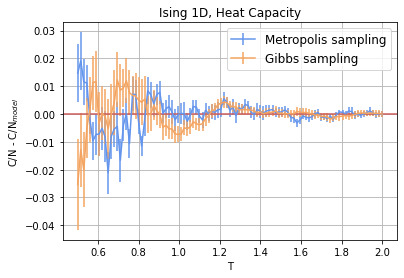

In [2]:
heat_metro = np.loadtxt("./data/metropolis/h_0/output_heat.dat", usecols = 3)
err_heat_metro = np.loadtxt("./data/metropolis/h_0/output_heat.dat", usecols = 4)
heat_gibbs = np.loadtxt("./data/gibbs/h_0/output_heat.dat", usecols = 3)
err_heat_gibbs = np.loadtxt("./data/gibbs/h_0/output_heat.dat", usecols = 4)

beta = 1/temp
th = np.tanh(J/temp)
thN= th**Ns
ch = 1./th

heat_mod = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.title('Ising 1D, Heat Capacity')
plt.xlabel('T')
plt.ylabel('C/N - C/N$_{model}$')
plt.errorbar(temp, heat_metro - heat_mod, yerr = err_heat_metro, color="cornflowerblue")
plt.errorbar(temp, heat_gibbs - heat_mod, yerr = err_heat_gibbs, color="sandybrown")
plt.legend(["Metropolis sampling","Gibbs sampling"], loc=0, fontsize=12)
plt.axhline(y = 0, color = "indianred", linestyle = '-')
plt.grid()
plt.show()

3. **Magnetization** per spin (with $h = 0.02$):

The statistical mechanics exact calculus is the following:

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

where, obviously, $\lambda_{1,2}$ have been recalculated with $h = 0.02$.

One can notice that the magnetization has a similar behaviour to the heat capacity, indeed, the uncertainty is higher at lower temperature, while it gets lower and lower with the arise of temperature, but one can see, again, a 2-$\sigma$ agreement with the analytic result.

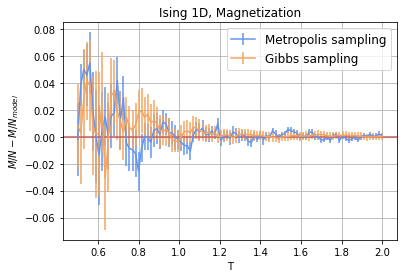

In [3]:
# simulation performed with external field h = 0.02
magn_metro = np.loadtxt("./data/metropolis/h_002/output_mag.dat", usecols = 3)
err_magn_metro = np.loadtxt("./data/metropolis/h_002/output_mag.dat", usecols = 4)
magn_gibbs = np.loadtxt("./data/gibbs/h_002/output_mag.dat", usecols = 3)
err_magn_gibbs = np.loadtxt("./data/gibbs/h_002/output_mag.dat", usecols = 4)

beta = 1/temp
th = np.tanh(J/temp)
thN= th**Ns
ch = 1./th

h = 0.02
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
magn_mod = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

plt.title('Ising 1D, Magnetization')
plt.xlabel('T')
plt.ylabel('$M/N - M/N_{model}$')
plt.errorbar(temp, magn_metro - magn_mod, yerr = err_magn_metro, color="cornflowerblue")
plt.errorbar(temp, magn_gibbs - magn_mod, yerr = err_magn_gibbs, color="sandybrown")
plt.legend(["Metropolis sampling","Gibbs sampling"], loc=0, fontsize=12)
plt.axhline(y = 0, color = "indianred", linestyle = '-')
plt.grid()
plt.show()

4. **Magnetic susceptibility** (with $h = 0$):

The statistical mechanics exact calculus is the following:

$$
\chi(N,T) = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Again, the result follows the trend of the heat capacity and the magnetization, in particular, at high temperature, the magnetic susceptibility has such small error bars, that they can't be seen.

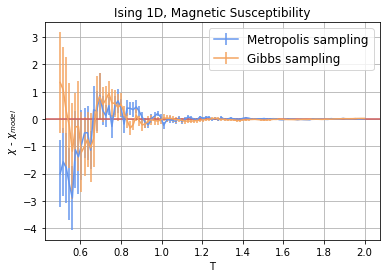

In [4]:
chi_metro = np.loadtxt("./data/metropolis/h_0/output_chi.dat", usecols = 3)
err_chi_metro = np.loadtxt("./data/metropolis/h_0/output_chi.dat", usecols = 4)
chi_gibbs = np.loadtxt("./data/gibbs/h_0/output_chi.dat", usecols = 3)
err_chi_gibbs = np.loadtxt("./data/gibbs/h_0/output_chi.dat", usecols = 4)

beta = 1/temp
th = np.tanh(J/temp)
thN= th**Ns
ch = 1./th
ener_mod = -J*( th + ch*thN )/( 1 + thN )

chi_mod = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.title('Ising 1D, Magnetic Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$ - $\chi_{model}$')
plt.errorbar(temp, chi_metro - chi_mod, yerr = err_chi_metro, color="cornflowerblue")
plt.errorbar(temp, chi_gibbs - chi_mod, yerr = err_chi_gibbs, color="sandybrown")
plt.legend(["Metropolis sampling","Gibbs sampling"], loc=0, fontsize=12)
plt.axhline(y = 0, color = "indianred", linestyle = '-')
plt.grid()
plt.show()